# Correlation Matrix

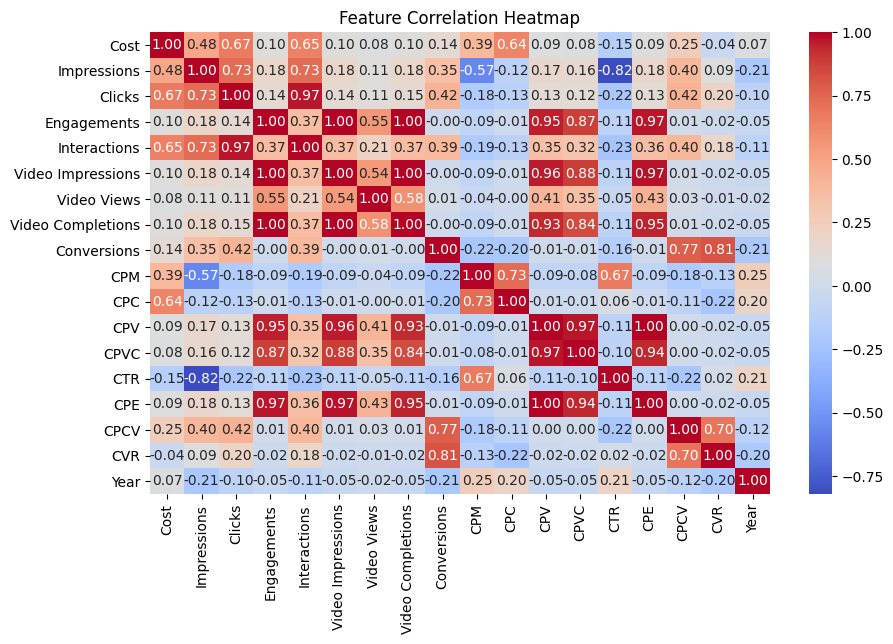

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

filtered_df = pd.read_csv('df_google_log.csv')

numeric_metrics = [
            col for col in filtered_df
            if np.issubdtype(filtered_df[col].dtype, np.number)
        ]
corr_matrix = filtered_df[numeric_metrics].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Compute ROI per channel over customisable time 

ROI

Google: 
if top funnel, = Impressions
if mid funnel, = Clicks
if bottom funnel, = Conversions

Meta:
if top funnel, = Impressions 
if mid funnel, = Clicks
if bottom funnel, = Link Clicks, Landing Page Views (Which ever higher)

For my dataset with the columns [Campaign Stage, Cost, Impressions, Clicks, Link Clicks, Landing Page Views], Campaign Stage has only 
3 possible values; ['Top Funnel','Mid Funnel', 'Bottom Funnel']

I want to create a column called ROI where
1. Check if 'Campaign Stage' is 'Top Funnel','Mid Funnel','Bottom Funnel'
2. If 'Top Funnel', 'Stage ROI' = Impressions/Cost  
3. If 'Mid Funnel', 'Stage ROI' = Clicks/Cost  
4. If 'Bottom Funnel', 'Stage ROI' = Link Clicks, Landing Page Views (Which ever higher)/Cost  

## Google

| Campaign Stage | ROI Formula          | Interpretation                         |
| -------------- | -------------------- | -------------------------------------- |
| Top Funnel     | `Impressions / Cost` | Cost-efficiency in generating reach    |
| Mid Funnel     | `Click / Cost`         | Cost-efficiency in generating clicks   |
| Bottom Funnel  | `Conversions / Cost` | Cost-efficiency in generating outcomes |

This isn't Return on Investment in the strict financial sense (which is usually: revenue - cost / cost), but you're clearly redefining "ROI" as stage-specific efficiency, which is fine — if you're consistent and transparent about that definition.

Yes, your logic is technically correct for a custom "stage-based efficiency" metric.
But it’s not traditional ROI, and should be named and interpreted accordingly.


In [7]:
import pandas as pd
import numpy as np

google_df = pd.read_csv('df_google_log.csv')

# Define conditions
conditions = [
    google_df['Campaign Stage'] == 'Top Funnel',
    google_df['Campaign Stage'] == 'Mid Funnel',
    google_df['Campaign Stage'] == 'Bottom Funnel'
]

# Define corresponding calculations
roi_values = [
    google_df['Impressions'] / google_df['Cost'],
    google_df['Clicks'] / google_df['Cost'],
    google_df['Conversions'] / google_df['Cost']
]

# Create the Stage ROI column
google_df['Stage ROI'] = np.select(conditions, roi_values, default=np.nan)
# google_df.to_csv('test.csv', index=False)

## Meta

| Campaign Stage | ROI Formula                                   | Why It Makes Sense                    |
| -------------- | --------------------------------------------- | ------------------------------------- |
| Top Funnel     | `Impressions / Cost`                          | Measures reach efficiency             |
| Mid Funnel     | `Clicks / Cost`                               | Measures engagement efficiency        |
| Bottom Funnel  | `max(Link Clicks, Landing Page Views) / Cost` | Measures conversion intent efficiency |


In [9]:
import pandas as pd
import numpy as np

meta_df = pd.read_csv('df_meta_log.csv')

# Define conditions
conditions = [
    meta_df['Campaign Stage'] == 'Top Funnel',
    meta_df['Campaign Stage'] == 'Mid Funnel',
    meta_df['Campaign Stage'] == 'Bottom Funnel'
]

# Corresponding ROI calculations
roi_values = [
    meta_df['Impressions'] / meta_df['Cost'],
    meta_df['Link Clicks'] / meta_df['Cost'],
    meta_df['Landing Page Views'] / meta_df['Cost']
]

# Apply conditions
meta_df['Stage ROI'] = np.select(conditions, roi_values, default=np.nan)

print(meta_df)


             Date                                           Campaign  \
0      2023-05-18  Mobile | Store Location Geofence Campaign Q2 |...   
1      2023-05-19  Mobile | Store Location Geofence Campaign Q2 |...   
2      2023-05-19  Mobile | Store Location Geofence Campaign Q2 |...   
3      2023-05-20  Mobile | Store Location Geofence Campaign Q2 |...   
4      2023-05-20  Mobile | Store Location Geofence Campaign Q2 |...   
...           ...                                                ...   
30955  2025-02-12  Unifi Biz | Unifi Business AO Social Boosting ...   
30956  2025-02-12  Unifi Biz | Unifi Business Campaign Digital Q1...   
30957  2025-02-12  Home | Unifi Home Always On BOLD Network Q1 20...   
30958  2025-02-12  Home | BB Always On ASC | Q1 2025 | Bottom Fun...   
30959  2025-02-12  Mobile | Unifi Mobile Always On Prepaid Q1 202...   

                                  Campaign Title Campaign Category  \
0            Store Location Geofence Campaign Q2            Mobil

# Plot ROI
- ROI over time 
- ROI by Campaign Stage
- ROI by Campaign Objective

In [16]:
import plotly.express as px

google_df = pd.read_csv('df_google_log_ROI.csv')

roi_by_stage = google_df.groupby('Campaign Stage', as_index=False)['Stage ROI'].mean()
roi_stage_time = google_df.groupby(['Date', 'Campaign Stage'], as_index=False)['Stage ROI'].mean()
roi_by_objective = google_df.groupby('Campaign Objective', as_index=False)['Stage ROI'].mean()
roi_objective_time = google_df.groupby(['Date', 'Campaign Objective'], as_index=False)['Stage ROI'].mean()

#Stage
fig = px.bar(
    roi_by_stage,
    x='Campaign Stage',
    y='Stage ROI',
    title='Average Stage ROI by Campaign Stage',
    labels={'Stage ROI': 'Stage ROI (per $ spent)'},
    color='Campaign Stage',  # optional: color by stage
    text_auto='.2f'  # show ROI values on bars
)
fig.update_layout(yaxis_title='Stage ROI', xaxis_title='Campaign Stage')
fig.show()

#Stage Time
fig = px.line(
    roi_stage_time,
    x='Date',
    y='Stage ROI',
    color='Campaign Stage',
    title='Stage ROI Over Time by Campaign Stage',
    markers=True,
    labels={'Stage ROI': 'ROI per $'}
)
fig.update_layout(xaxis_title='Date', yaxis_title='Stage ROI')
fig.show()

#Objective
fig = px.bar(
    roi_by_objective,
    x='Campaign Objective',
    y='Stage ROI',
    title='Average Stage ROI by Campaign Objective',
    labels={'Stage ROI': 'Stage ROI (per $ spent)'},
    color='Campaign Objective',  # optional: color by stage
    text_auto='.2f'  # show ROI values on bars
)
fig.update_layout(yaxis_title='Stage ROI', xaxis_title='Campaign Objective')
fig.show()

#Objective Time
fig = px.line(
    roi_objective_time,
    x='Date',
    y='Stage ROI',
    color='Campaign Objective',
    title='Stage ROI Over Time by Campaign Objective',
    markers=True,
    labels={'Stage ROI': 'ROI per $'}
)
fig.update_layout(xaxis_title='Date', yaxis_title='Stage ROI')
fig.show()


# Diminishing Returns Curve

From your dataset:

- Cost (ad spend input)

- Conversions or Stage ROI (output response)

- Granularity (Date, Campaign, Platform, etc.)

That’s sufficient to fit and visualize diminishing marginal returns.

## Option 1: Empirical Fit (Loess or Polynomial)

In [22]:
import plotly.express as px
import statsmodels.api as sm

df = pd.read_csv('df_google_log_ROI.csv')

# Aggregate by Campaign or Date
df_grouped = df.groupby('Cost', as_index=False)['Stage ROI'].mean()

# Loess smooth
lowess = sm.nonparametric.lowess
smoothed = lowess(df_grouped['Stage ROI'], df_grouped['Cost'], frac=0.3)
df_grouped['Smoothed ROI'] = [y for _, y in smoothed]

fig = px.scatter(df_grouped, x='Cost', y='Stage ROI', title="Diminishing Returns on Ad Spend")
fig.add_scatter(x=df_grouped['Cost'], y=df_grouped['Smoothed ROI'], mode='lines', name='Smoothed ROI')
# st.plotly_chart(fig, use_container_width=True)
fig.show()


## Option 2: Fit a Diminishing Returns Function

In [25]:
import plotly.graph_objects as go
from scipy.optimize import curve_fit
import numpy as np

# Define diminishing returns function
def diminishing_returns(x, a, b):
    return a * (1 - np.exp(-b * x))

# Extract x and y
x = df_grouped['Cost'].values
y = df_grouped['Stage ROI'].values

# Fit the curve
popt, _ = curve_fit(diminishing_returns, x, y, bounds=(0, [np.inf, 1]))

# Predict fitted values
df_grouped['Fitted ROI'] = diminishing_returns(x, *popt)

# Sort x for a smooth line
sorted_df = df_grouped.sort_values(by='Cost')

# Plot only the fitted curve
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=sorted_df['Cost'],
    y=sorted_df['Fitted ROI'],
    mode='lines',
    name='Fitted Curve',
    line=dict(color='royalblue', width=3)
))

fig.update_layout(
    title='Diminishing Returns Curve (Fitted Only)',
    xaxis_title='Cost',
    yaxis_title='Stage ROI',
    template='plotly_white'
)

# st.plotly_chart(fig, use_container_width=True)  # or fig.show() if not in Streamlit
fig.show()


| Setup                 | Interpretation                                       | Use Case                      | Mathematically Valid?               |
| --------------------- | ---------------------------------------------------- | ----------------------------- | ----------------------------------- |
| **X = Cost, Y = ROI** | What ROI do I get as I spend more?                   | Budget planning, optimization | ✅ (intended use)                    |
| **X = ROI, Y = Cost** | How much do I need to spend to reach a specific ROI? | Reverse inference (rare)      | 🚫 Not standard, requires inversion |


DR says that the output cannot continue to increase at the same rate after a certain point. After a certain point, also called the saturation point, each dollar you spend has a relatively lower impact.

In [ ]:
import plotly.graph_objects as go
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

# Define diminishing returns function
def diminishing_returns(x, a, b):
    return a * (1 - np.exp(-b * x))

# Extract x and y
x = df_grouped['Cost'].values
y = df_grouped['Stage ROI'].values

# Fit the curve
popt, _ = curve_fit(diminishing_returns, x, y, bounds=(0, [np.inf, 1]))
a, b = popt

# Predict fitted values
df_grouped['Fitted ROI'] = diminishing_returns(x, *popt)

# Calculate saturation point (95% of a)
saturation_x = -np.log(0.05) / b
saturation_y = diminishing_returns(saturation_x, *popt)

# Sort for smooth plotting
sorted_df = df_grouped.sort_values(by='Cost')

# Plot
fig = go.Figure()

# Add diminishing returns line
fig.add_trace(go.Scatter(
    x=sorted_df['Cost'],
    y=sorted_df['Fitted ROI'],
    mode='lines',
    name='Fitted Curve',
    line=dict(color='royalblue', width=3)
))

# Add saturation point
fig.add_trace(go.Scatter(
    x=[saturation_x],
    y=[saturation_y],
    mode='markers+text',
    name='Saturation Point (~95%)',
    marker=dict(color='red', size=10),
    text=[f"({saturation_x:.2f}, {saturation_y:.2f})"],
    textposition="top center"
))

# Layout
fig.update_layout(
    title='Diminishing Returns Curve with Saturation Point for Stage ROI',
    xaxis_title='Cost',
    yaxis_title='Stage ROI',
    template='plotly_white'
)

# st.plotly_chart(fig, use_container_width=True)  # Or fig.show() if not in Streamlit
fig.show()

In [43]:
import plotly.graph_objects as go
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

# Define diminishing returns function
def diminishing_returns(x, a, b):
    return a * (1 - np.exp(-b * x))

# Extract x and y
x = df_grouped['Cost'].values
y = df_grouped['Stage ROI'].values

# Fit the curve
popt, _ = curve_fit(diminishing_returns, x, y, bounds=(0, [np.inf, 1]))
a, b = popt

# Predict fitted values
df_grouped['Fitted ROI'] = diminishing_returns(x, *popt)

# Calculate saturation point (95% of a)
saturation_x = -np.log(0.05) / b
saturation_y = diminishing_returns(saturation_x, *popt)

# Sort for smooth plotting
sorted_df = df_grouped.sort_values(by='Cost')

# Plot
fig = go.Figure()

# Add diminishing returns line
fig.add_trace(go.Scatter(
    x=sorted_df['Cost'],
    y=sorted_df['Fitted ROI'],
    mode='lines',
    name='Fitted Curve',
    line=dict(color='royalblue', width=3)
))

# Add saturation point
fig.add_trace(go.Scatter(
    x=[saturation_x],
    y=[saturation_y],
    mode='markers+text',
    name='Saturation Point (~95%)',
    marker=dict(color='red', size=10),
    text=[f"({saturation_x:.2f}, {saturation_y:.2f})"],
    textposition="top center"
))

# Layout
fig.update_layout(
    title='Diminishing Returns Curve with Saturation Point for Stage ROI',
    xaxis_title='Cost',
    yaxis_title='Stage ROI',
    template='plotly_white'
)

# st.plotly_chart(fig, use_container_width=True)  # Or fig.show() if not in Streamlit
fig.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.optimize import curve_fit

# 1. Load data
df = pd.read_csv('df_google_log_ROI.csv')

# 2. Define diminishing returns function
def diminishing_returns(x, a, b):
    return a * (1 - np.exp(-b * x))

# 3. Group by objective and cost, average ROI
roi_by_objective = df.groupby(['Campaign Objective', 'Cost'], as_index=False)['objective ROI'].mean()

# 4. Unique objectives
objectives = roi_by_objective['Campaign Objective'].unique()

# 5. Plotly figure
fig = go.Figure()

# 6. Loop through each objective and fit curve
for objective in objectives:
    objective_df = roi_by_objective[roi_by_objective['Campaign Objective'] == objective].copy()

    x = objective_df['Cost'].values
    y = objective_df['Stage ROI'].values

    # Ensure enough data points and variation
    if len(objective_df['Cost'].unique()) < 3 or np.std(x) == 0 or np.std(y) == 0:
        print(f"Skipping {objective}: not enough variation or data")
        continue

    try:
        popt, _ = curve_fit(diminishing_returns, x, y, bounds=(0, [np.inf, 1]))
        a, b = popt
        objective_df['Fitted ROI'] = diminishing_returns(x, *popt)

        # Sort for smooth curve
        objective_df = objective_df.sort_values(by='Cost')

        # Add fitted line
        fig.add_trace(go.Scatter(
            x=objective_df['Cost'],
            y=objective_df['Fitted ROI'],
            mode='lines',
            name=f'{objective} Curve',
            line=dict(width=3)
        ))

        # Add saturation point (95%)
        saturation_x = -np.log(0.05) / b
        saturation_y = diminishing_returns(saturation_x, *popt)
        fig.add_trace(go.Scatter(
            x=[saturation_x],
            y=[saturation_y],
            mode='markers+text',
            name=f'{objective} Saturation',
            marker=dict(size=10),
            text=[f"{objective} 95% Saturation"],
            textposition='top center'
        ))

    except Exception as e:
        print(f"Skipping objective {objective} due to fitting error: {e}")

# 7. Final layout
fig.update_layout(
    title='Diminishing Returns Curves by Campaign Objective with Saturation Points',
    xaxis_title='Cost',
    yaxis_title='Stage ROI',
    template='plotly_white'
)

fig.show()

In [48]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.optimize import curve_fit

# 1. Load data
df = pd.read_csv('df_google_log_ROI.csv')

# 2. Define diminishing returns function
def diminishing_returns(x, a, b):
    return a * (1 - np.exp(-b * x))

# 3. Group by stage and cost, average ROI
roi_by_stage = df.groupby(['Campaign Stage', 'Cost'], as_index=False)['Stage ROI'].mean()

# 4. Unique stages
stages = roi_by_stage['Campaign Stage'].unique()

# 5. Plotly figure
fig = go.Figure()

# 6. Loop through each stage and fit curve
for stage in stages:
    stage_df = roi_by_stage[roi_by_stage['Campaign Stage'] == stage].copy()

    x = stage_df['Cost'].values
    y = stage_df['Stage ROI'].values

    # Ensure enough data points and variation
    if len(x) < 3 or np.std(x) == 0 or np.std(y) == 0:
        continue

    try:
        popt, _ = curve_fit(diminishing_returns, x, y, bounds=(0, [np.inf, 1]))
        a, b = popt
        stage_df['Fitted ROI'] = diminishing_returns(x, *popt)

        # Sort for smooth curve
        stage_df = stage_df.sort_values(by='Cost')

        # Add fitted line
        fig.add_trace(go.Scatter(
            x=stage_df['Cost'],
            y=stage_df['Fitted ROI'],
            mode='lines',
            name=f'{stage} Curve',
            line=dict(width=3)
        ))

        # Add saturation point (95%)
        saturation_x = -np.log(0.05) / b
        saturation_y = diminishing_returns(saturation_x, *popt)
        fig.add_trace(go.Scatter(
            x=[saturation_x],
            y=[saturation_y],
            mode='markers+text',
            name=f'{stage} Saturation',
            marker=dict(size=10),
            text=[f"{stage} 95% Saturation"],
            textposition='top center'
        ))

    except Exception as e:
        print(f"Skipping stage {stage} due to fitting error: {e}")

# 7. Final layout
fig.update_layout(
    title='Diminishing Returns Curves by Campaign Stage with Saturation Points',
    xaxis_title='Cost',
    yaxis_title='Stage ROI',
    template='plotly_white'
)

fig.show()

Skipping stage Bottom Funnel due to fitting error: Optimal parameters not found: The maximum number of function evaluations is exceeded.
